In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:>

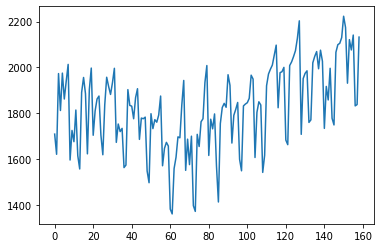

In [6]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

In [7]:
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
13*12+3

159

# Splitting data

In [9]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

# Moving Average 

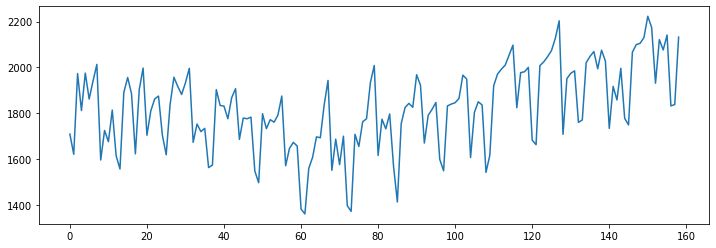

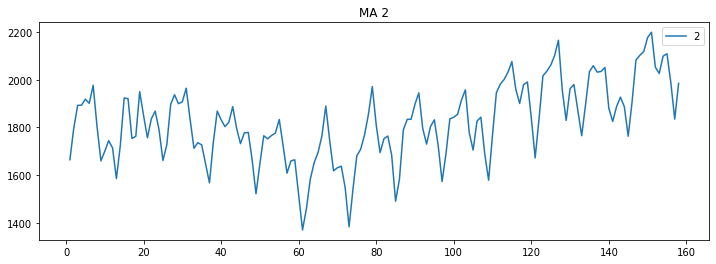

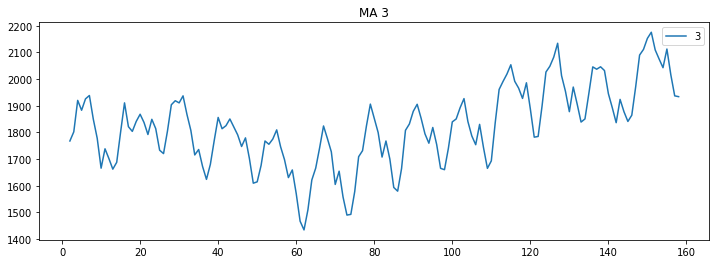

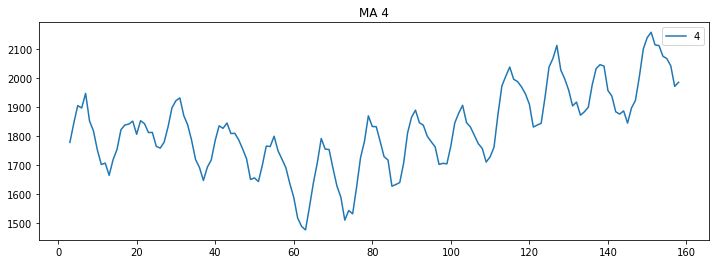

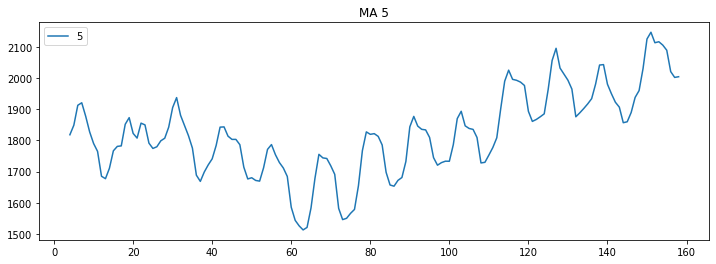

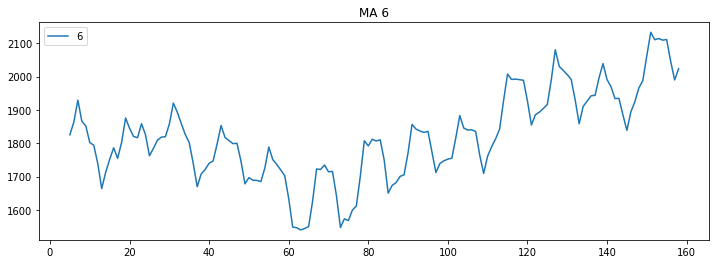

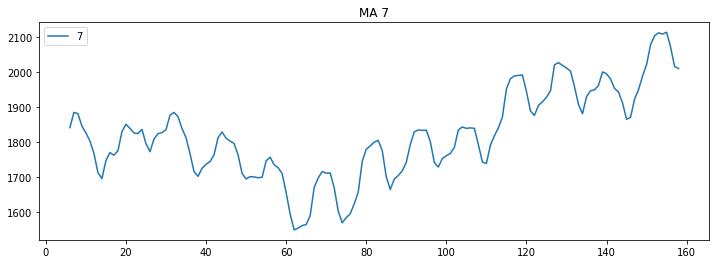

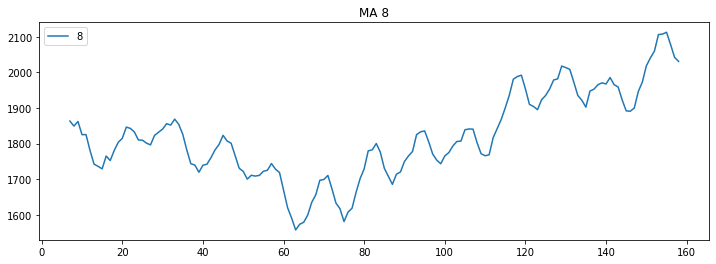

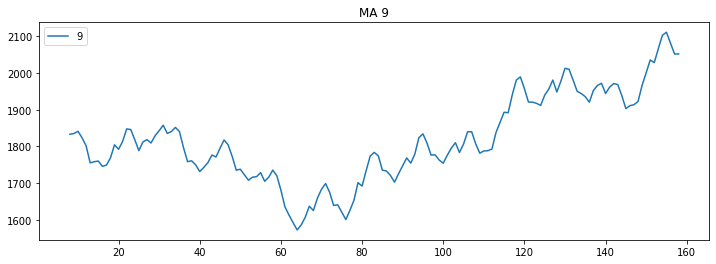

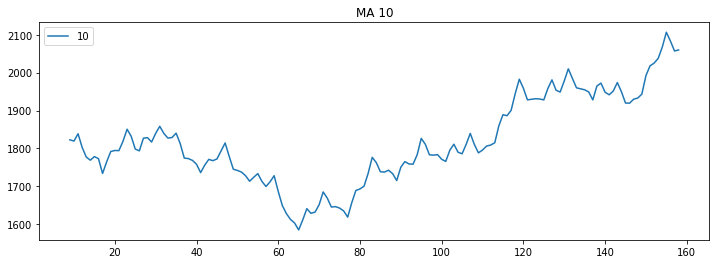

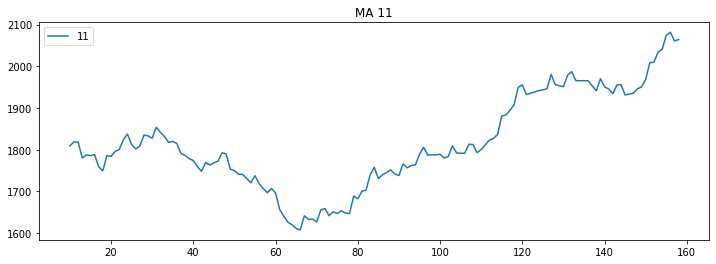

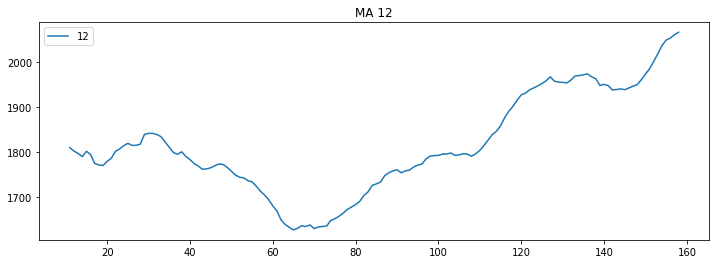

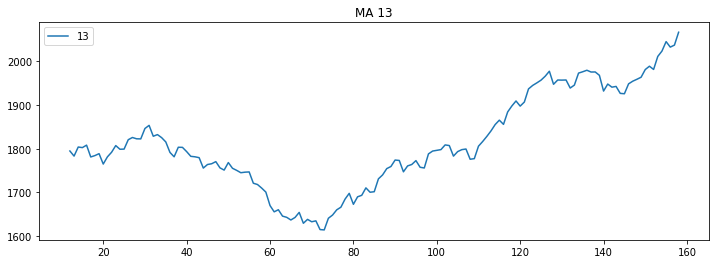

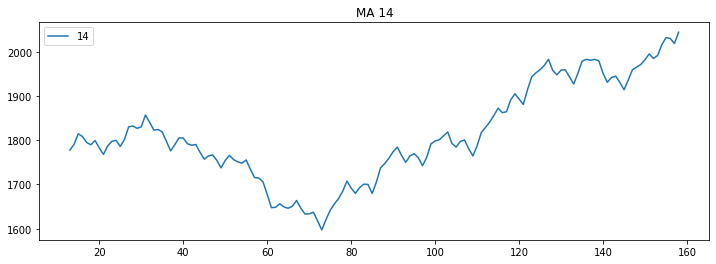

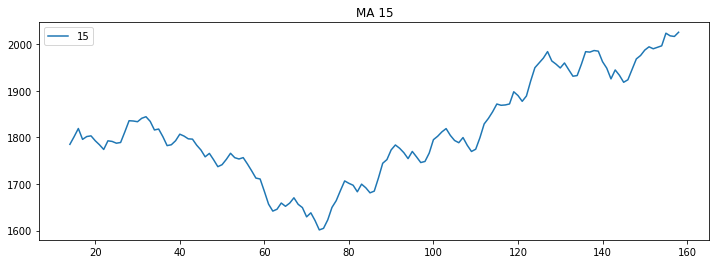

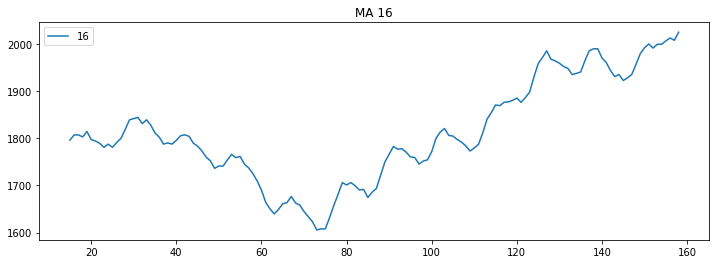

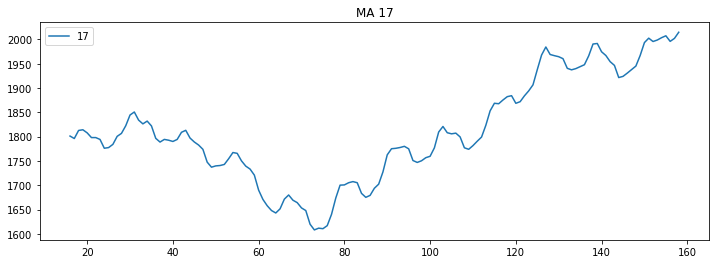

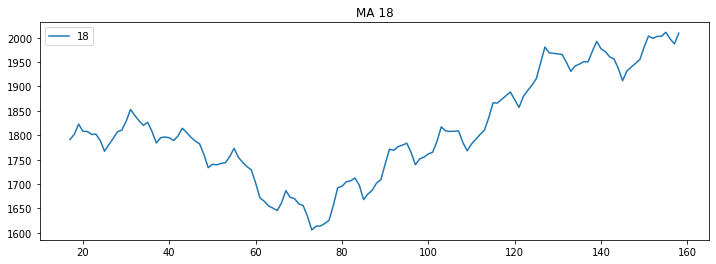

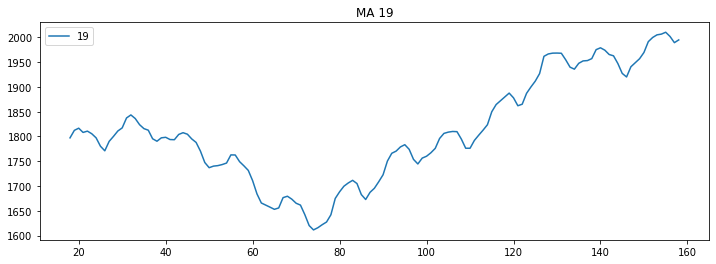

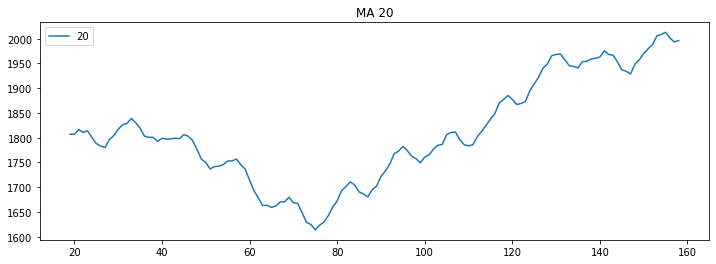

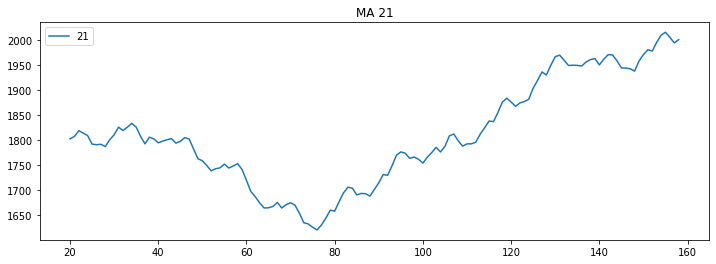

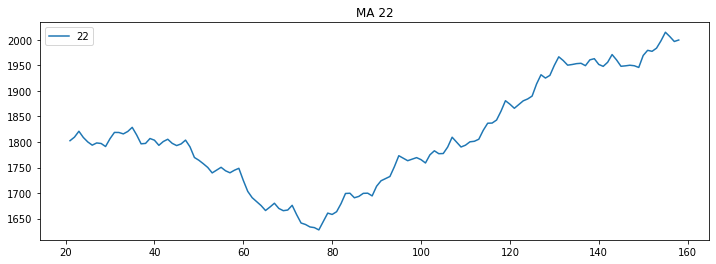

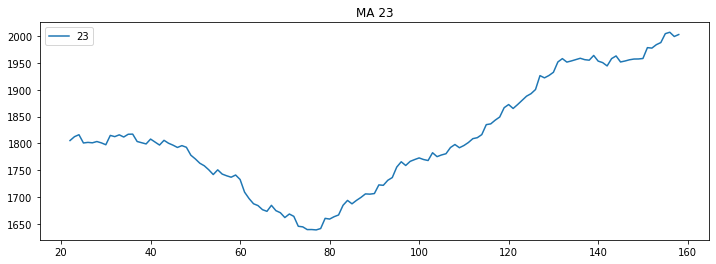

In [10]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
for i in range(2,24):
    plt.figure(figsize=(12,4))


    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()


# Time series decomposition plot 


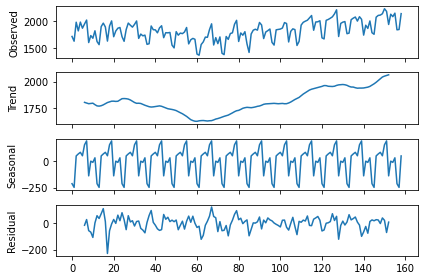

In [11]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,freq=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


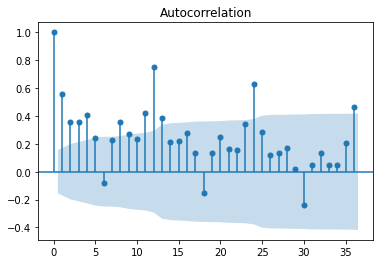

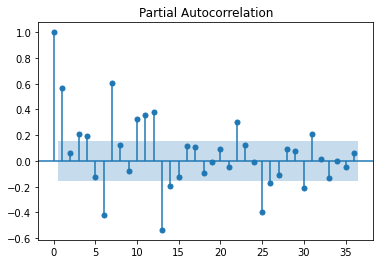

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=36)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=36)
plt.show()

### Evaluation Metric MAPE

In [10]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [13]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 


8.490637057828362

### Holt method 

In [15]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend


In [16]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2.90001076738437

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [17]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

3.122149916009715

## Final Model by combining train and test

In [18]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [19]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2134.775213
160    2163.742368
161    2116.063051
162    2219.340802
163    2259.752216
164    1928.850218
165    2066.682363
166    2048.655349
167    2096.982097
168    1863.374752
dtype: float64